# Project 2 Clustering

## Data check

In [1]:
# Load data

import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=42)

In [2]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [3]:
dataset.target_names

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']

In [4]:
# making data binary label -> Ground truth
def get_labels(train_dataset):
    labels = []
    new_name = ['Computer Technology','Recreational Activity']

    for label in train_dataset.target:
        name = train_dataset.target_names[label]
        if name.startswith('comp'):
            labels.append(0)
        elif name.startswith('rec'):
            labels.append(1)
        else:
            print('Wrong type!')
    
    return labels, new_name

label, label_name = get_labels(dataset)

#check the new binary label
print(np.unique(label))
print(label_name)

[0 1]
['Computer Technology', 'Recreational Activity']


## Question 1:
Report the dimensions of the TF-IDF matrix you get

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vec = CountVectorizer(min_df=3,stop_words='english')
data_vec = vec.fit_transform(dataset.data)

tfidf = TfidfTransformer()
data_tfidf = tfidf.fit_transform(data_vec)

In [6]:
# show time
print(data_tfidf.shape)

(7882, 27768)


## Question 2:
Report the contingency table of your clustering result.

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=1000, n_init=30, random_state=0)
km.fit(data_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
from sklearn.metrics.cluster import contingency_matrix

#true_label = [int(x / 4) for x in dataset.target]

print(contingency_matrix(label, km.labels_))

[[   4 3899]
 [1718 2261]]


## Question 3:
Report the 5 measures above for the K-means clustering results you get.

In [9]:
from sklearn.metrics.cluster import homogeneity_score,\
                                    completeness_score,\
                                    v_measure_score,\
                                    adjusted_rand_score,\
                                    adjusted_mutual_info_score

In [10]:
print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

The homogeneity score is: 0.2535958928926043
The completeness_score score is: 0.334815748824373
The V-measure score is: 0.28860033608397917
The adjusted Rand Index score is: 0.18076179588914554
The adjusted mutual information score is: 0.25352755133060884


## Question 4:
Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000

In [11]:
from sklearn.decomposition import TruncatedSVD

r = 1000
svd = TruncatedSVD(1000)
svd.fit(data_tfidf)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

Text(0,0.5,'Percent of the Variance')

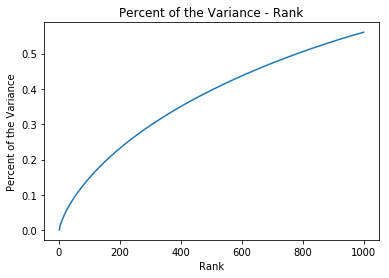

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

ratio = svd.explained_variance_ratio_.cumsum()
x = np.array(range(1, 1001))

plt.plot(x, ratio)
plt.title('Percent of the Variance - Rank')
plt.xlabel('Rank')
plt.ylabel('Percent of the Variance')

## Question 5:
Let r be the dimension that we want to reduce the data to (i.e. n_components).

Try r = 1,2,3,5,10,20,50,100,300, and plot the 5 measure scores v.s. r for both SVD and NMF.

Report the best r choice for SVD and NMF respectively.

Note: what is “best” after all? What if some measures contradict with each other? Here you are faced with this challenge that you need to decide which measure you value the most, and design your own standard of “best”. Please explain your standard and justify it.

### SVD

In [13]:
# process data using svd
ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
hs,cs,vs,ars,amis = [],[],[],[],[]
for rank in ranks:
    svd = TruncatedSVD(n_components=rank)
    data_svd_r = svd.fit_transform(data_tfidf)
    
    # apply k-means
    km.fit(data_svd_r)
    
    # calculate 5 scores
    hs.append(homogeneity_score(label,km.labels_))
    cs.append(completeness_score(label,km.labels_))
    vs.append(v_measure_score(label,km.labels_))
    ars.append(adjusted_rand_score(label,km.labels_))
    amis.append(adjusted_mutual_info_score(label,km.labels_))

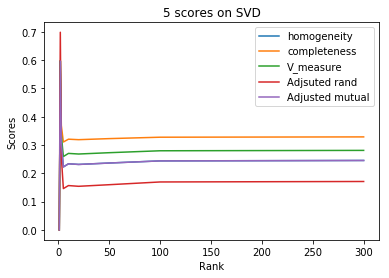

In [14]:
# plot 
plt.plot(ranks, hs)
plt.plot(ranks, cs)
plt.plot(ranks, vs)
plt.plot(ranks, ars)
plt.plot(ranks, amis)
plt.title('5 scores on SVD')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

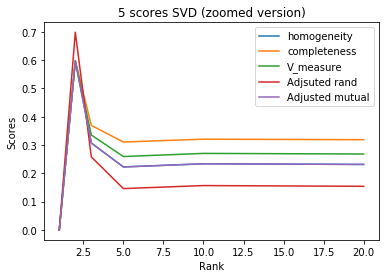

In [15]:
# plot within rank = 50
plt.plot(ranks[:6], hs[:6])
plt.plot(ranks[:6], cs[:6])
plt.plot(ranks[:6], vs[:6])
plt.plot(ranks[:6], ars[:6])
plt.plot(ranks[:6], amis[:6])
plt.title('5 scores SVD (zoomed version)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

#### The best rank for SVD seems to be 2.

### NMF

In [16]:
# process data using nmf
from sklearn.decomposition import NMF

ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
hs_nmf,cs_nmf,vs_nmf,ars_nmf,amis_nmf = [],[],[],[],[]
for rank in ranks:
    nmf = NMF(n_components=rank)
    data_nmf_r = nmf.fit_transform(data_tfidf)
    
    # apply k-means
    km.fit(data_nmf_r)
    
    # calculate 5 scores
    hs_nmf.append(homogeneity_score(label,km.labels_))
    cs_nmf.append(completeness_score(label,km.labels_))
    vs_nmf.append(v_measure_score(label,km.labels_))
    ars_nmf.append(adjusted_rand_score(label,km.labels_))
    amis_nmf.append(adjusted_mutual_info_score(label,km.labels_))

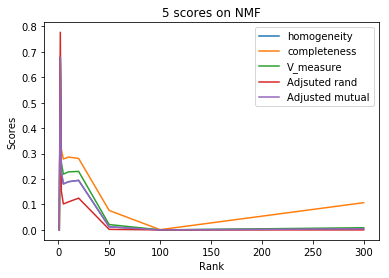

In [17]:
# plot 
plt.plot(ranks, hs_nmf)
plt.plot(ranks, cs_nmf)
plt.plot(ranks, vs_nmf)
plt.plot(ranks, ars_nmf)
plt.plot(ranks, amis_nmf)
plt.title('5 scores on NMF')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

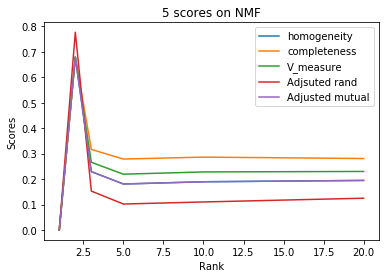

In [18]:
# plot within 20
plt.plot(ranks[:6], hs_nmf[:6])
plt.plot(ranks[:6], cs_nmf[:6])
plt.plot(ranks[:6], vs_nmf[:6])
plt.plot(ranks[:6], ars_nmf[:6])
plt.plot(ranks[:6], amis_nmf[:6])
plt.title('5 scores on NMF')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

#### The best rank for NMF seems to be 2 too.

## Question 6:
How do you explain the non-monotonic behavior of the measures as r increases?

## Question 7:
Visualize the clustering results for:
- SVD with its best r
- NMF with its best r

In [19]:
# reduce to 2-D using SVD
svd = TruncatedSVD(n_components=2)
data_svd_2 = svd.fit_transform(data_tfidf)
# reduce to 2-D using NMF
nmf = NMF(n_components=2)
data_nmf_2 = nmf.fit_transform(data_tfidf)

### SVD

Text(0.5,1,'Ground truth cluster (NMF)')

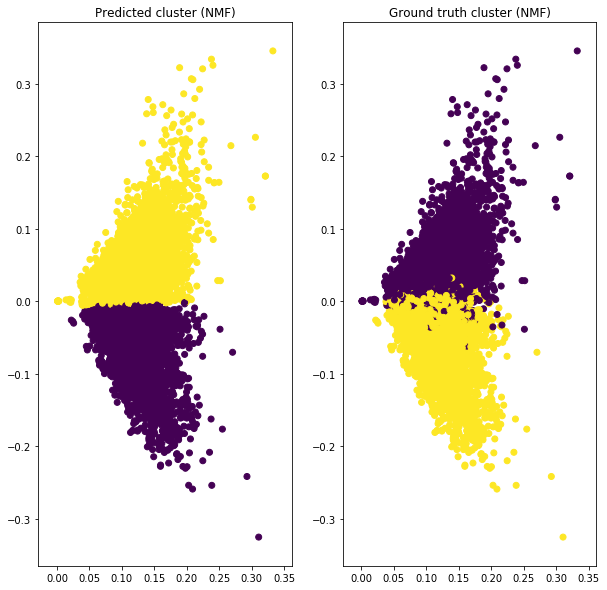

In [34]:
# visulizing svd
plt.figure(figsize=(10, 10))

#X_svd = km.fit_transform(data_svd_2)
km.fit(data_svd_2)
y_pred_svd = km.predict(data_svd_2)

plt.subplot(121)
plt.scatter(data_svd_2[:, 0], data_svd_2[:, 1], c=y_pred_svd)
plt.title("Predicted cluster (NMF)")

plt.subplot(122)
plt.scatter(data_svd_2[:, 0], data_svd_2[:, 1], c=label)
plt.title("Ground truth cluster (NMF)")

### NMF

Text(0.5,1,'Ground truth cluster (NMF)')

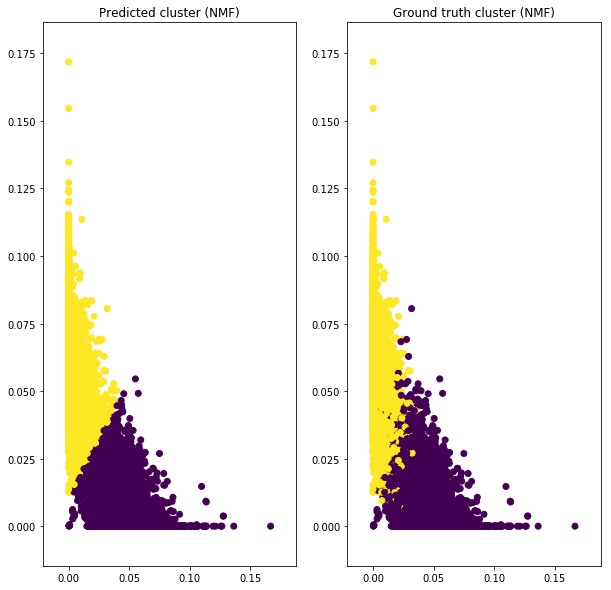

In [39]:
plt.figure(figsize=(10, 10))

#X_nmf = km.fit_transform(data_nmf_2)
km.fit(data_nmf_2)
y_pred_nmf = km.predict(data_nmf_2)

plt.subplot(121)
plt.scatter(data_nmf_2[:, 0], data_nmf_2[:, 1], c=y_pred_nmf)
plt.title("Predicted cluster (NMF)")

plt.subplot(122)
plt.scatter(data_nmf_2[:, 0], data_nmf_2[:, 1], c=label)
plt.title("Ground truth cluster (NMF)")

## Question 8:
Visulaize the **transformed** data as in part (a).